# Analysis and Report on ATP Tennis Tournament Data

## Introduction
This report presents an exploratory analysis of ATP tennis tournament data using the provided dataset. The dataset includes detailed information on tennis matches, such as player characteristics, scores, bookmakers' odds, and other relevant variables.

## Dataset Structure and Meaning

- **Tournament:** The name of the tennis tournament where the match took place.

- **Date:** The exact date when the match occurred.

- **Series:** The level of the tournament (e.g., International, Grand Slam, Masters).

- **Court:** The type of court where the match was played (e.g., Outdoor, Indoor).

- **Surface:** The playing surface of the court (e.g., Hard, Clay, Grass).

- **Round:** The stage of the tournament (e.g., 1st Round, Quarterfinals).

- **Best of:** The number of sets required to win the match (e.g., Best of 3, Best of 5).

- **Player_1:** The name of the first player participating in the match.

- **Player_2:** The name of the second player participating in the match.

- **Winner:** The player who won the match.

- **Rank_1:** The ATP ranking of Player 1 at the time of the match.

- **Rank_2:** The ATP ranking of Player 2 at the time of the match.

- **Pts_1:** The number of ATP points accumulated by Player 1.

- **Pts_2:** The number of ATP points accumulated by Player 2.

- **Odd_1:** The bookmaker odds for Player 1's victory.

- **Odd_2:** The bookmaker odds for Player 2's victory.

- **Score:** The final score of the match, indicating the number of sets won by each player.


In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [99]:
# Load the dataset
df = pd.read_csv('atp_tennis.csv')

In [92]:
df.head()

Tournament        Date         Series    Court  \
0  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
1  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
2  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
3  Australian Hardcourt Championships  2000-01-03  International  Outdoor   
4  Australian Hardcourt Championships  2000-01-03  International  Outdoor   

  Surface      Round  Best of        Player_1       Player_2       Winner  \
0    Hard  1st Round        3      Dosedel S.    Ljubicic I.   Dosedel S.   
1    Hard  1st Round        3      Clement A.     Enqvist T.   Enqvist T.   
2    Hard  1st Round        3       Escude N.  Baccanello P.    Escude N.   
3    Hard  1st Round        3  Knippschild J.     Federer R.   Federer R.   
4    Hard  1st Round        3     Fromberg R.  Woodbridge T.  Fromberg R.   

   Rank_1  Rank_2  Pts_1  Pts_2  Odd_1  Odd_2        Score  
0      63      77     -1     -1   -1.0   -1.0      6-4 6-2  
1      56       5     -1     -1   -1.0   -1.0      3-6 3-6  
2      40     655     -1     -1   -1.0   -1.0  6-7 7-5 6-3  
3      87      65     -1     -1   -1.0   -1.0      1-6 4-6  
4      81     198     -1     -1   -1.0   -1.0  7-6 5-7 6-4

##  Initial Data Exploration and Analyses
The initial dataset consists of 63,025 entries and 17 columns, containing information such as tournament name, date, surface type, players' ATP ranks, accumulated ATP points, and more. No missing values were detected, indicating data completeness.

In [100]:
# Display the dimensions of the dataset
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (63025, 17)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63025 entries, 0 to 63024
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  63025 non-null  object 
 1   Date        63025 non-null  object 
 2   Series      63025 non-null  object 
 3   Court       63025 non-null  object 
 4   Surface     63025 non-null  object 
 5   Round       63025 non-null  object 
 6   Best of     63025 non-null  int64  
 7   Player_1    63025 non-null  object 
 8   Player_2    63025 non-null  object 
 9   Winner      63025 non-null  object 
 10  Rank_1      63025 non-null  int64  
 11  Rank_2      63025 non-null  int64  
 12  Pts_1       63025 non-null  int64  
 13  Pts_2       63025 non-null  int64  
 14  Odd_1       63025 non-null  float64
 15  Odd_2       63025 non-null  float64
 16  Score       63025 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.2+ MB


In [101]:
print(f"Duplicates before removal: {df.duplicated().sum()}")

Duplicates before removal: 0


In [102]:
# Convert dates to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63025 entries, 0 to 63024
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tournament  63025 non-null  object        
 1   Date        63025 non-null  datetime64[ns]
 2   Series      63025 non-null  object        
 3   Court       63025 non-null  object        
 4   Surface     63025 non-null  object        
 5   Round       63025 non-null  object        
 6   Best of     63025 non-null  int64         
 7   Player_1    63025 non-null  object        
 8   Player_2    63025 non-null  object        
 9   Winner      63025 non-null  object        
 10  Rank_1      63025 non-null  int64         
 11  Rank_2      63025 non-null  int64         
 12  Pts_1       63025 non-null  int64         
 13  Pts_2       63025 non-null  int64         
 14  Odd_1       63025 non-null  float64       
 15  Odd_2       63025 non-null  float64       
 16  Score       63025 non-

In [104]:
# Display descriptive statistics for numerical columns
df.describe()

Date       Best of        Rank_1  \
count                          63025  63025.000000  63025.000000   
mean   2011-09-28 11:29:49.746925824      3.376644     75.863578   
min              2000-01-03 00:00:00      3.000000     -1.000000   
25%              2005-07-18 00:00:00      3.000000     24.000000   
50%              2011-06-18 00:00:00      3.000000     53.000000   
75%              2017-08-31 00:00:00      3.000000     92.000000   
max              2024-06-23 00:00:00      5.000000   3390.000000   
std                              NaN      0.781945    100.477704   

             Rank_2         Pts_1         Pts_2         Odd_1         Odd_2  
count  63025.000000  63025.000000  63025.000000  63025.000000  63025.000000  
mean      75.516493   1105.023959   1111.481745      2.404059      2.396076  
min       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000  
25%       24.000000     14.000000     16.000000      1.330000      1.330000  
50%       54.000000    680.000000    681.000000      1.730000      1.761000  
75%       92.000000   1215.000000   1220.000000      2.750000      2.750000  
max     4915.000000  16950.000000  16950.000000     67.000000     51.000000  
std      101.163253   1710.136806   1737.027433      2.664418      2.619288

- **Best of**: The average value is approximately 3.38, indicating that most matches are best of 3 sets, typical for ATP tournaments.
  
- **Rank_1 and Rank_2**: The average ATP ranks are 75.86 and 75.52 respectively. The high standard deviations suggest a wide variability in player rankings across matches.

- **Pts_1 and Pts_2**: The average ATP points accumulated are 1105.02 and 1111.48 respectively. The large standard deviations indicate considerable variability in the points accumulated by players in different matches.

- **Odd_1 and Odd_2**: The average betting odds for both players are 2.40. The high maximum values suggest outliers or extreme values in the betting odds, possibly reflecting unexpected outcomes or mismatches according to bookmakers.


In [117]:
# Adding Winner, Loser, and related columns
df['Winner'] = df.apply(lambda row: row['Player_1'] if row['Winner'] == row['Player_1'] else row['Player_2'], axis=1)
df['Loser'] = df.apply(lambda row: row['Player_2'] if row['Winner'] == row['Player_1'] else row['Player_1'], axis=1)
df['Winner_Rank'] = df.apply(lambda row: row['Rank_1'] if row['Winner'] == row['Player_1'] else row['Rank_2'], axis=1)
df['Loser_Rank'] = df.apply(lambda row: row['Rank_2'] if row['Winner'] == row['Player_1'] else row['Rank_1'], axis=1)
df['Winner_Pts'] = df.apply(lambda row: row['Pts_1'] if row['Winner'] == row['Player_1'] else row['Pts_2'], axis=1)
df['Loser_Pts'] = df.apply(lambda row: row['Pts_2'] if row['Winner'] == row['Player_1'] else row['Pts_1'], axis=1)
df['Winner_Odd'] = df.apply(lambda row: row['Odd_1'] if row['Winner'] == row['Player_1'] else row['Odd_2'], axis=1)
df['Loser_Odd'] = df.apply(lambda row: row['Odd_2'] if row['Winner'] == row['Player_1'] else row['Odd_1'], axis=1)


# Display descriptive statistics for newly added columns
df[['Winner_Rank', 'Loser_Rank', 'Winner_Pts', 'Loser_Pts', 'Winner_Odd', 'Loser_Odd']].describe()


Winner_Rank    Loser_Rank    Winner_Pts     Loser_Pts    Winner_Odd  \
count  63025.000000  63025.000000  63025.000000  63025.000000  63025.000000   
mean      58.942689     92.437382   1399.326807    817.178897      1.646026   
std       72.039471    120.744323   2103.815731   1160.328247      1.224562   
min        1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
25%       17.000000     35.000000     35.000000      8.000000      1.200000   
50%       42.000000     65.000000    785.000000    602.000000      1.444000   
75%       78.000000    105.000000   1525.000000    995.000000      2.000000   
max     1890.000000   4915.000000  16950.000000  16950.000000     34.000000   

          Loser_Odd  
count  63025.000000  
mean       3.154109  
std        3.364982  
min       -1.000000  
25%        1.610000  
50%        2.370000  
75%        3.500000  
max       67.000000

- **Winner_Rank**: The average ATP ranking of winners is 58.94, indicating that, on average, winning players are relatively well-ranked. The range from 1 to 1890 shows a wide spectrum of player rankings, with the minimum being the best-ranked player winning.

- **Loser_Rank**: The average ATP ranking of losers is 92.44, higher than that of winners. This suggests that players with lower rankings (worse rankings) tend to lose more often. The presence of -1 as the minimum value might indicate missing or erroneous data points.

- **Winner_Pts**: Winners accumulate an average of 1399.33 ATP points, indicating they typically have accumulated a substantial number of points. The minimum value of -1 could indicate missing or erroneous data entries.

- **Loser_Pts**: Losers accumulate an average of 817.18 ATP points, which is lower than that of winners. This suggests that players with fewer ATP points tend to lose more often. The minimum value of -1 again could indicate missing or erroneous data.

- **Winner_Odd**: The average betting odds for winners are 1.65, indicating that winners are usually perceived as favorites by bookmakers. The maximum odds of 34 suggest there are instances where significant underdogs managed to win.

- **Loser_Odd**: The average betting odds for losers are 3.15, higher than that of winners. This suggests that losers are generally seen as underdogs by bookmakers. The maximum odds of 67 indicate matches where underdogs had very high odds, possibly reflecting unexpected outcomes.


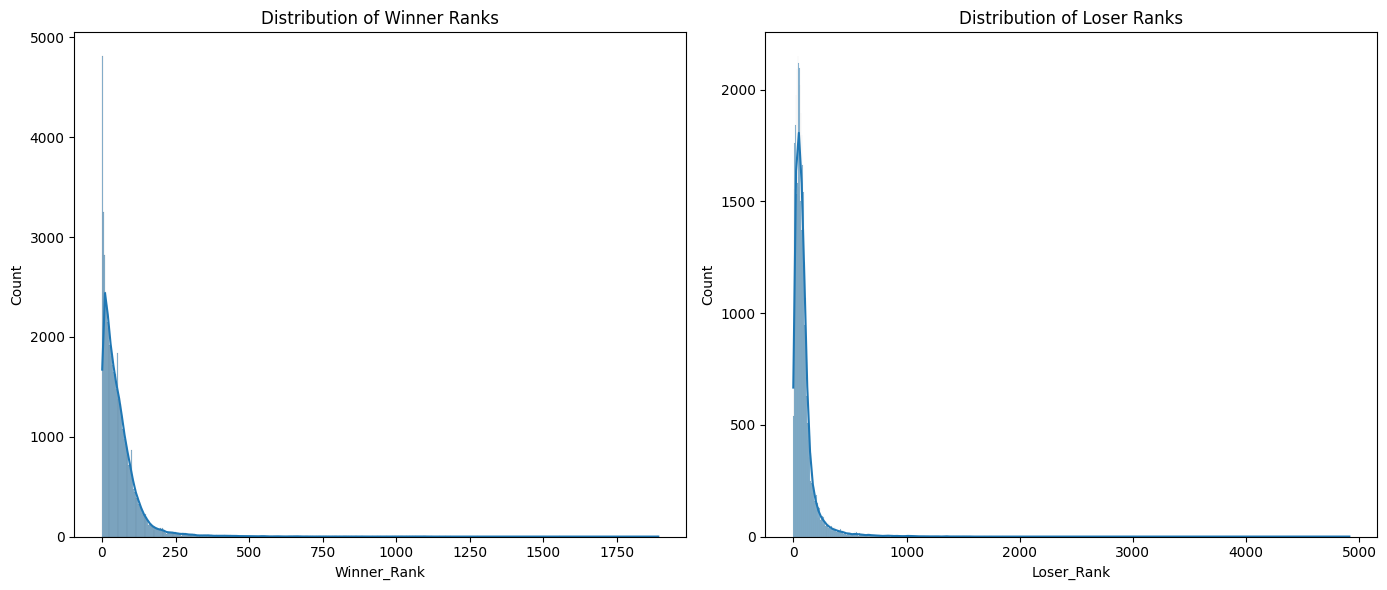

In [118]:
# Plotting histograms for Winner and Loser ranks
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Winner_Rank'], kde=True)
plt.title('Distribution of Winner Ranks')

plt.subplot(1, 2, 2)
sns.histplot(df['Loser_Rank'], kde=True)
plt.title('Distribution of Loser Ranks')

plt.tight_layout()
plt.show()

#### Distribution of Winner Ranks:
- Most winners have lower ranks (indicating they are better ranked).
- There is a high density of winners around ranks below 100.

#### Distribution of Loser Ranks:
- Losers have a wider distribution of ranks, with also a high density around ranks below 100, but more spread out compared to winners.

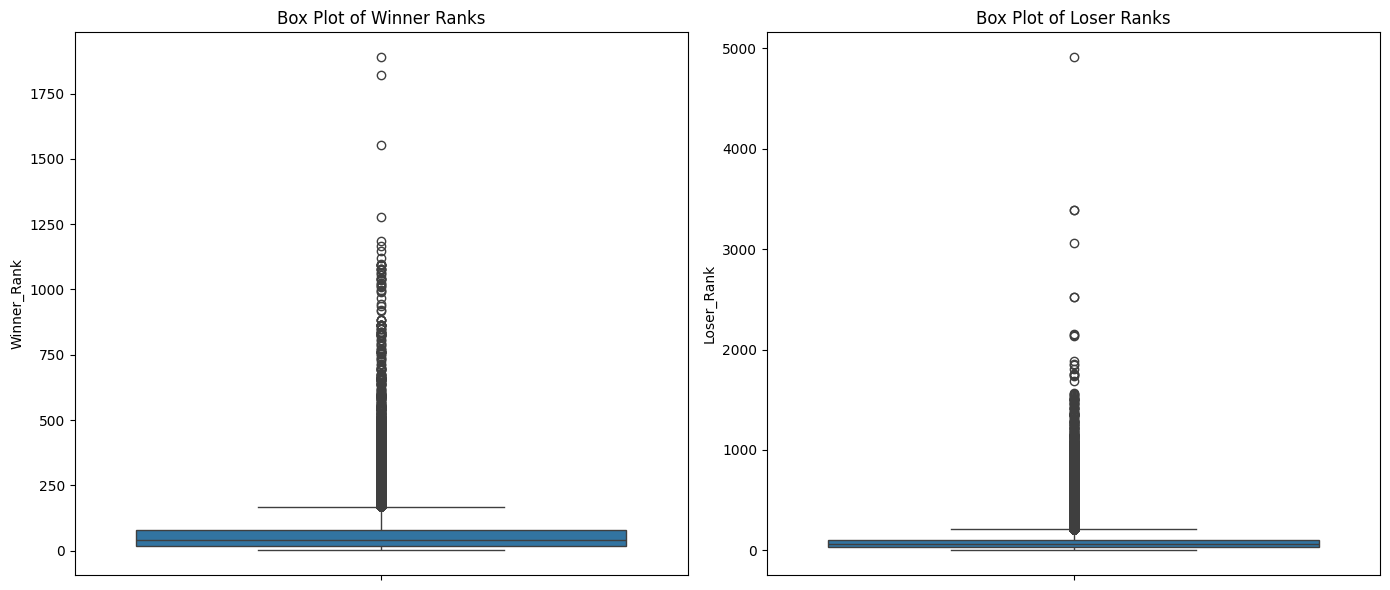

In [119]:
# Plotting box plots for Winner and Loser ranks
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Winner_Rank'])
plt.title('Box Plot of Winner Ranks')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Loser_Rank'])
plt.title('Box Plot of Loser Ranks')

plt.tight_layout()
plt.show()

#### Box Plot of Winner Ranks:

- The median is quite low, indicating that winners are generally well-ranked.
- The distribution has some outliers, which are lower-ranked players who have won matches.

#### Box Plot of Loser Ranks:

- The median is higher compared to winners, indicating that losers are generally less well-ranked.
- There are also outliers here, showing that some higher-ranked players have lost matches.

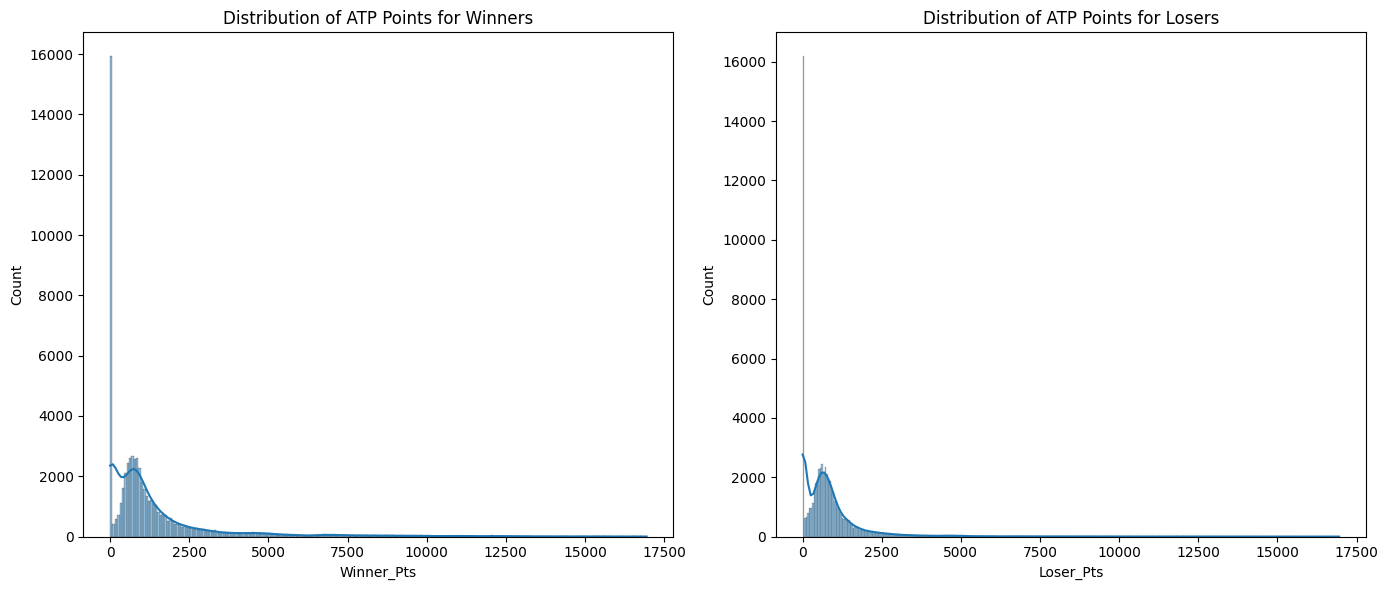

In [120]:
# Plotting histograms for ATP points of Winners and Loser
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Winner_Pts'], kde=True)
plt.title('Distribution of ATP Points for Winners')

plt.subplot(1, 2, 2)
sns.histplot(df['Loser_Pts'], kde=True)
plt.title('Distribution of ATP Points for Losers')

plt.tight_layout()
plt.show()

#### Distribution of ATP Points for Winners:

- Most winners have accumulated a significant number of ATP points, as expected for higher-ranked players.
- The distribution indicates a concentration around higher levels of ATP points.

#### Distribution of ATP Points for Losers:

- The distribution is similar to that of winners but with a lower density at higher levels of ATP points.


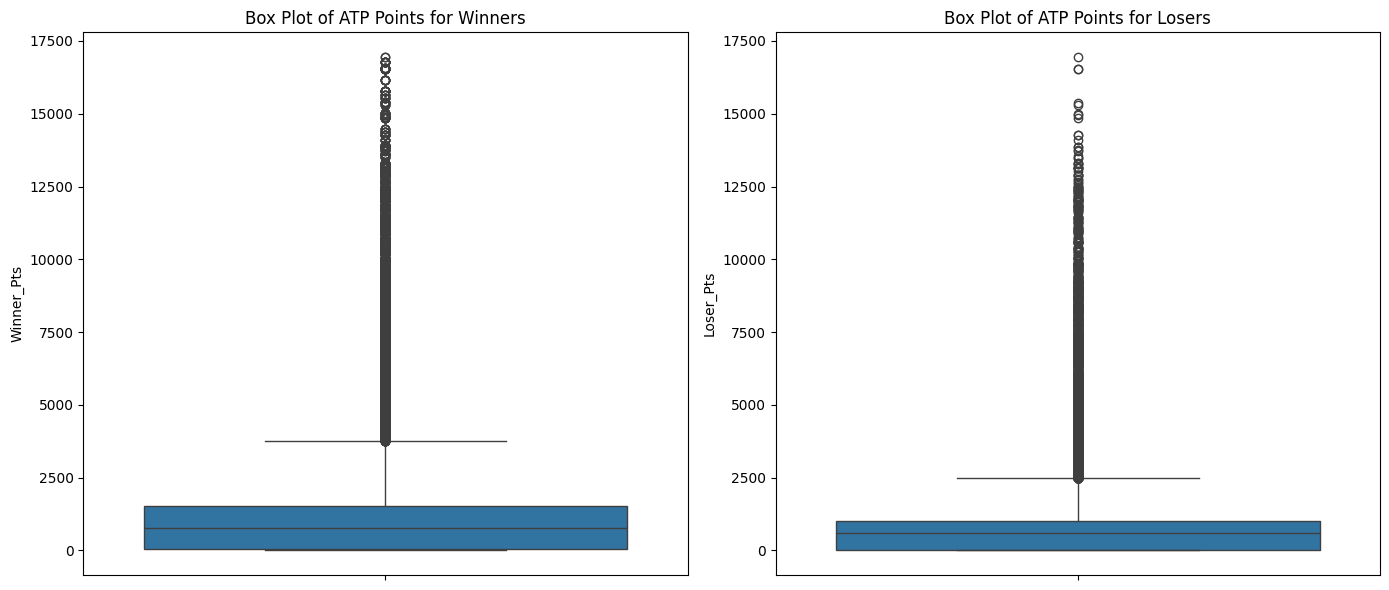

In [121]:
# Plotting box plots for ATP points of Winners and Losers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Winner_Pts'])
plt.title('Box Plot of ATP Points for Winners')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Loser_Pts'])
plt.title('Box Plot of ATP Points for Losers')

plt.tight_layout()
plt.show()

#### Box Plot of ATP Points for Winners:

- The median is relatively high, indicating that winners generally have a good number of ATP points.
- There are outliers indicating some winners had either abnormally high or low ATP points.

#### Box Plot of ATP Points for Losers:

- The median is lower compared to winners, but there is still a wide dispersion of data.
- Outliers are present, indicating losers with highly varied levels of ATP points.


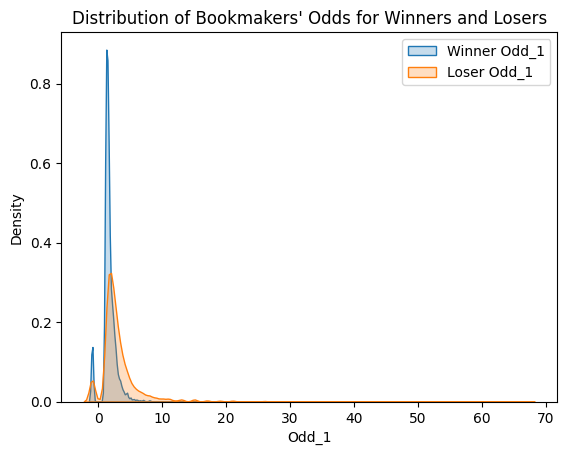

In [122]:
# Comparing the distribution of odds for winners and losers
sns.kdeplot(df.loc[df['Winner'] == df['Player_1'], 'Odd_1'], label='Winner Odd_1', fill=True)
sns.kdeplot(df.loc[df['Winner'] != df['Player_1'], 'Odd_1'], label='Loser Odd_1', fill=True)
plt.title('Distribution of Bookmakers\' Odds for Winners and Losers')
plt.legend()
plt.show()

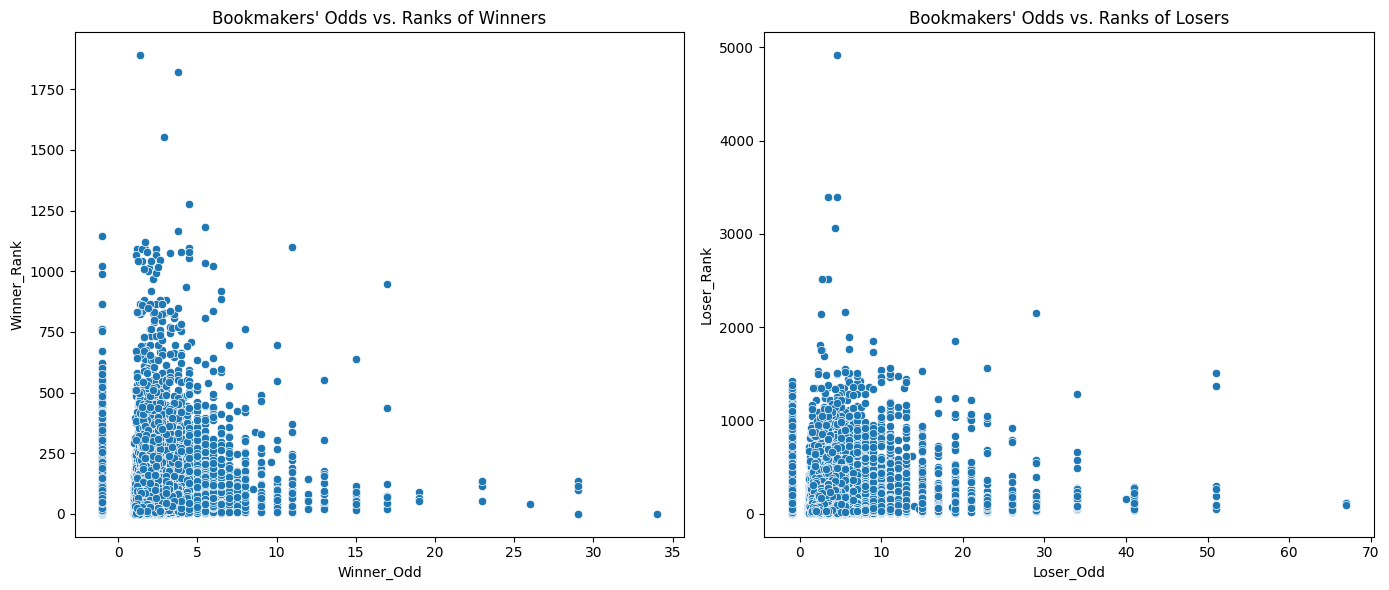

In [123]:
# Plotting scatter plots of bookmakers' odds vs. ranks for winners and losers
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Winner_Odd', y='Winner_Rank', data=df)
plt.title('Bookmakers\' Odds vs. Ranks of Winners')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Loser_Odd', y='Loser_Rank', data=df)
plt.title('Bookmakers\' Odds vs. Ranks of Losers')

plt.tight_layout()
plt.show()

#### Bookmakers' Odds Based on Winners' Rankings:

- A decreasing trend is evident: odds are lower for higher-ranked players.
- Higher-ranked winners generally have lower odds (are more favored).

#### Bookmakers' Odds Based on Losers' Rankings:

- Odds are more dispersed for losers, but there is a tendency for higher odds among lower-ranked players.


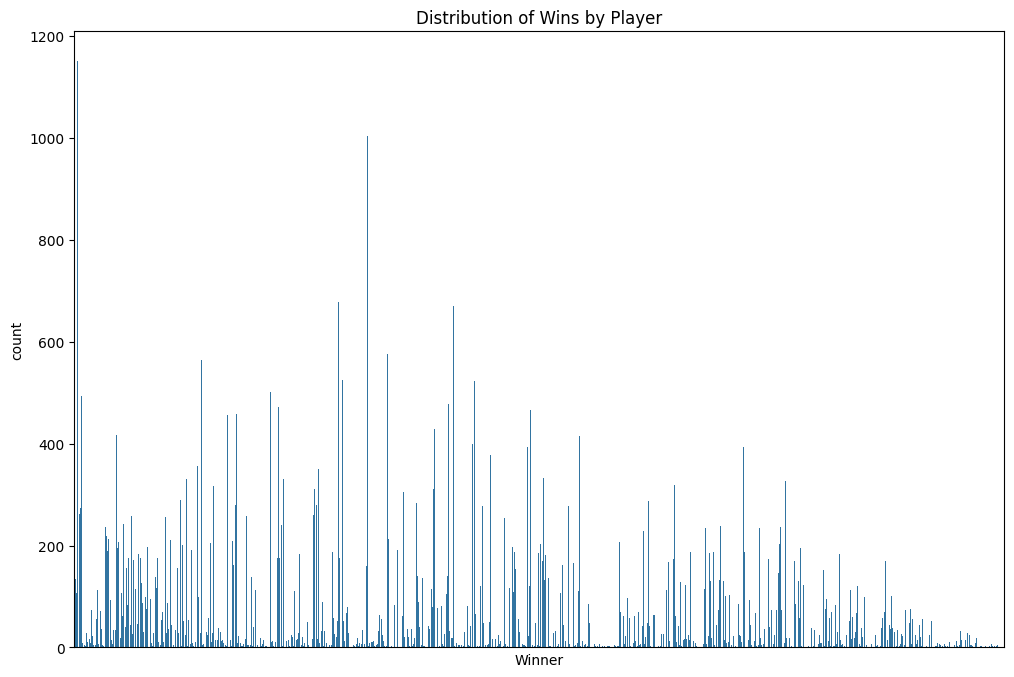

In [129]:
#Distribution of Wins by Player
plt.figure(figsize=(12, 8))  


sns.countplot(x='Winner', data=df)

plt.title('Distribution of Wins by Player')

plt.xticks(rotation=45)
plt.xticks([])
plt.show()

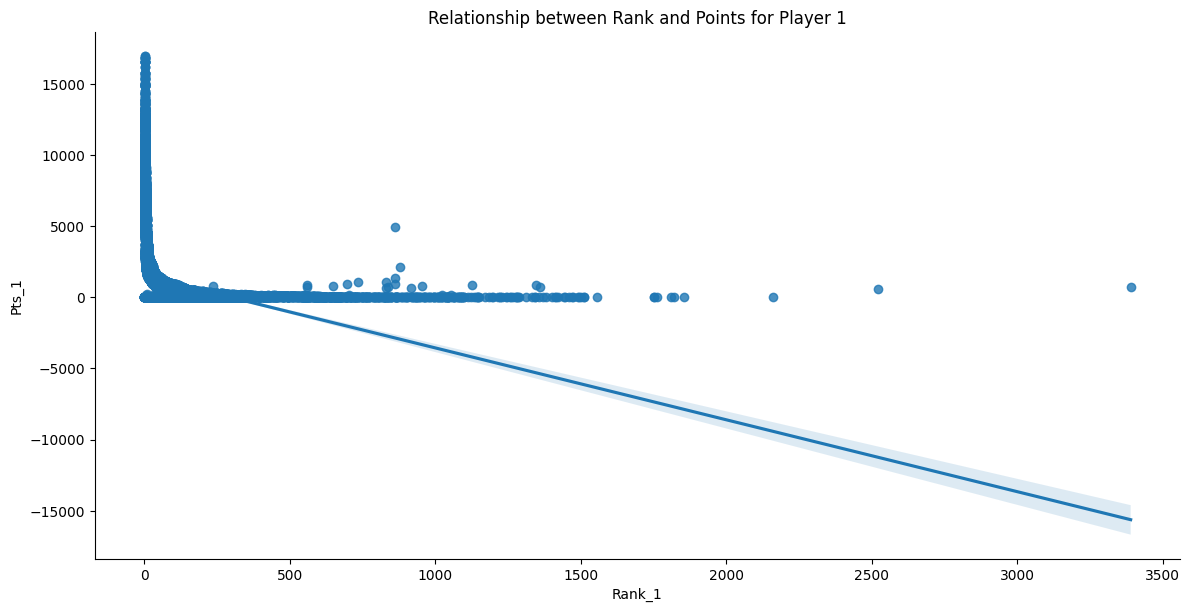

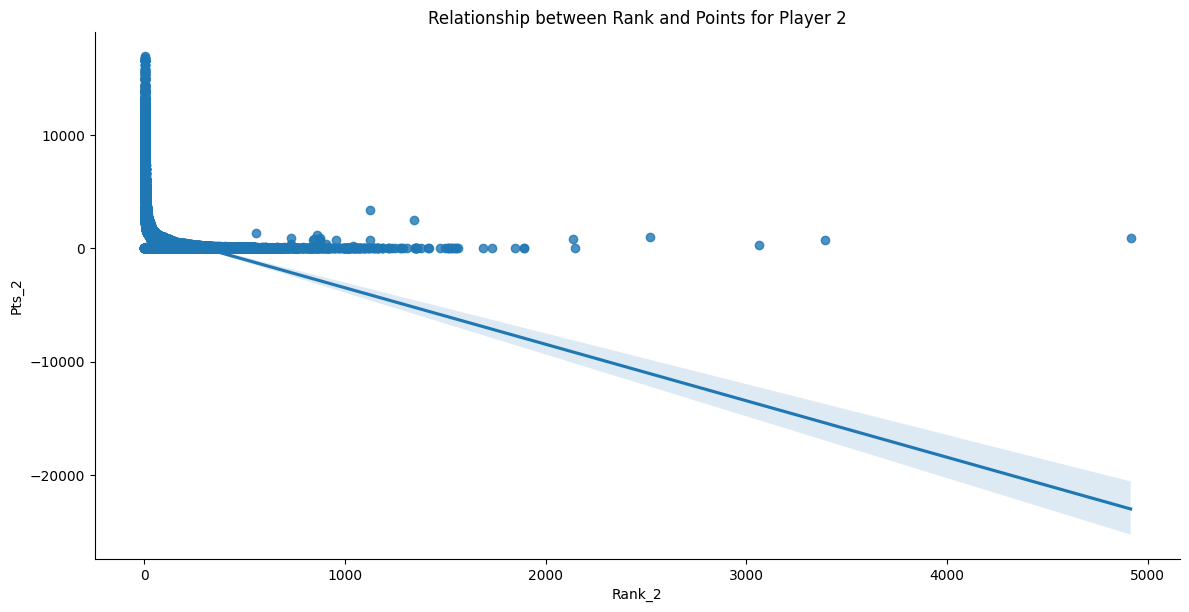

In [107]:
# Analyzing the relationship between rank and points for Player 1 and Player 2
sns.lmplot(x='Rank_1', y='Pts_1', data=df, aspect=2, height=6)
plt.title('Relationship between Rank and Points for Player 1')
plt.show()

sns.lmplot(x='Rank_2', y='Pts_2', data=df, aspect=2, height=6)
plt.title('Relationship between Rank and Points for Player 2')
plt.show()

#### Player 1: Scatter Plot Analysis of Rank vs. Points

- Generally, there is a trend where lower player ranks (higher rank values) correspond to higher ATP points.
- The regression line confirms this negative correlation between rank and points.

#### Player 2: Scatter Plot Analysis of Rank vs. Point

- Similar to Player 1, there is a negative correlation between rank and points.
- Players with lower ranks (higher rank values) tend to accumulate more ATP points, as indicated by the regression line.


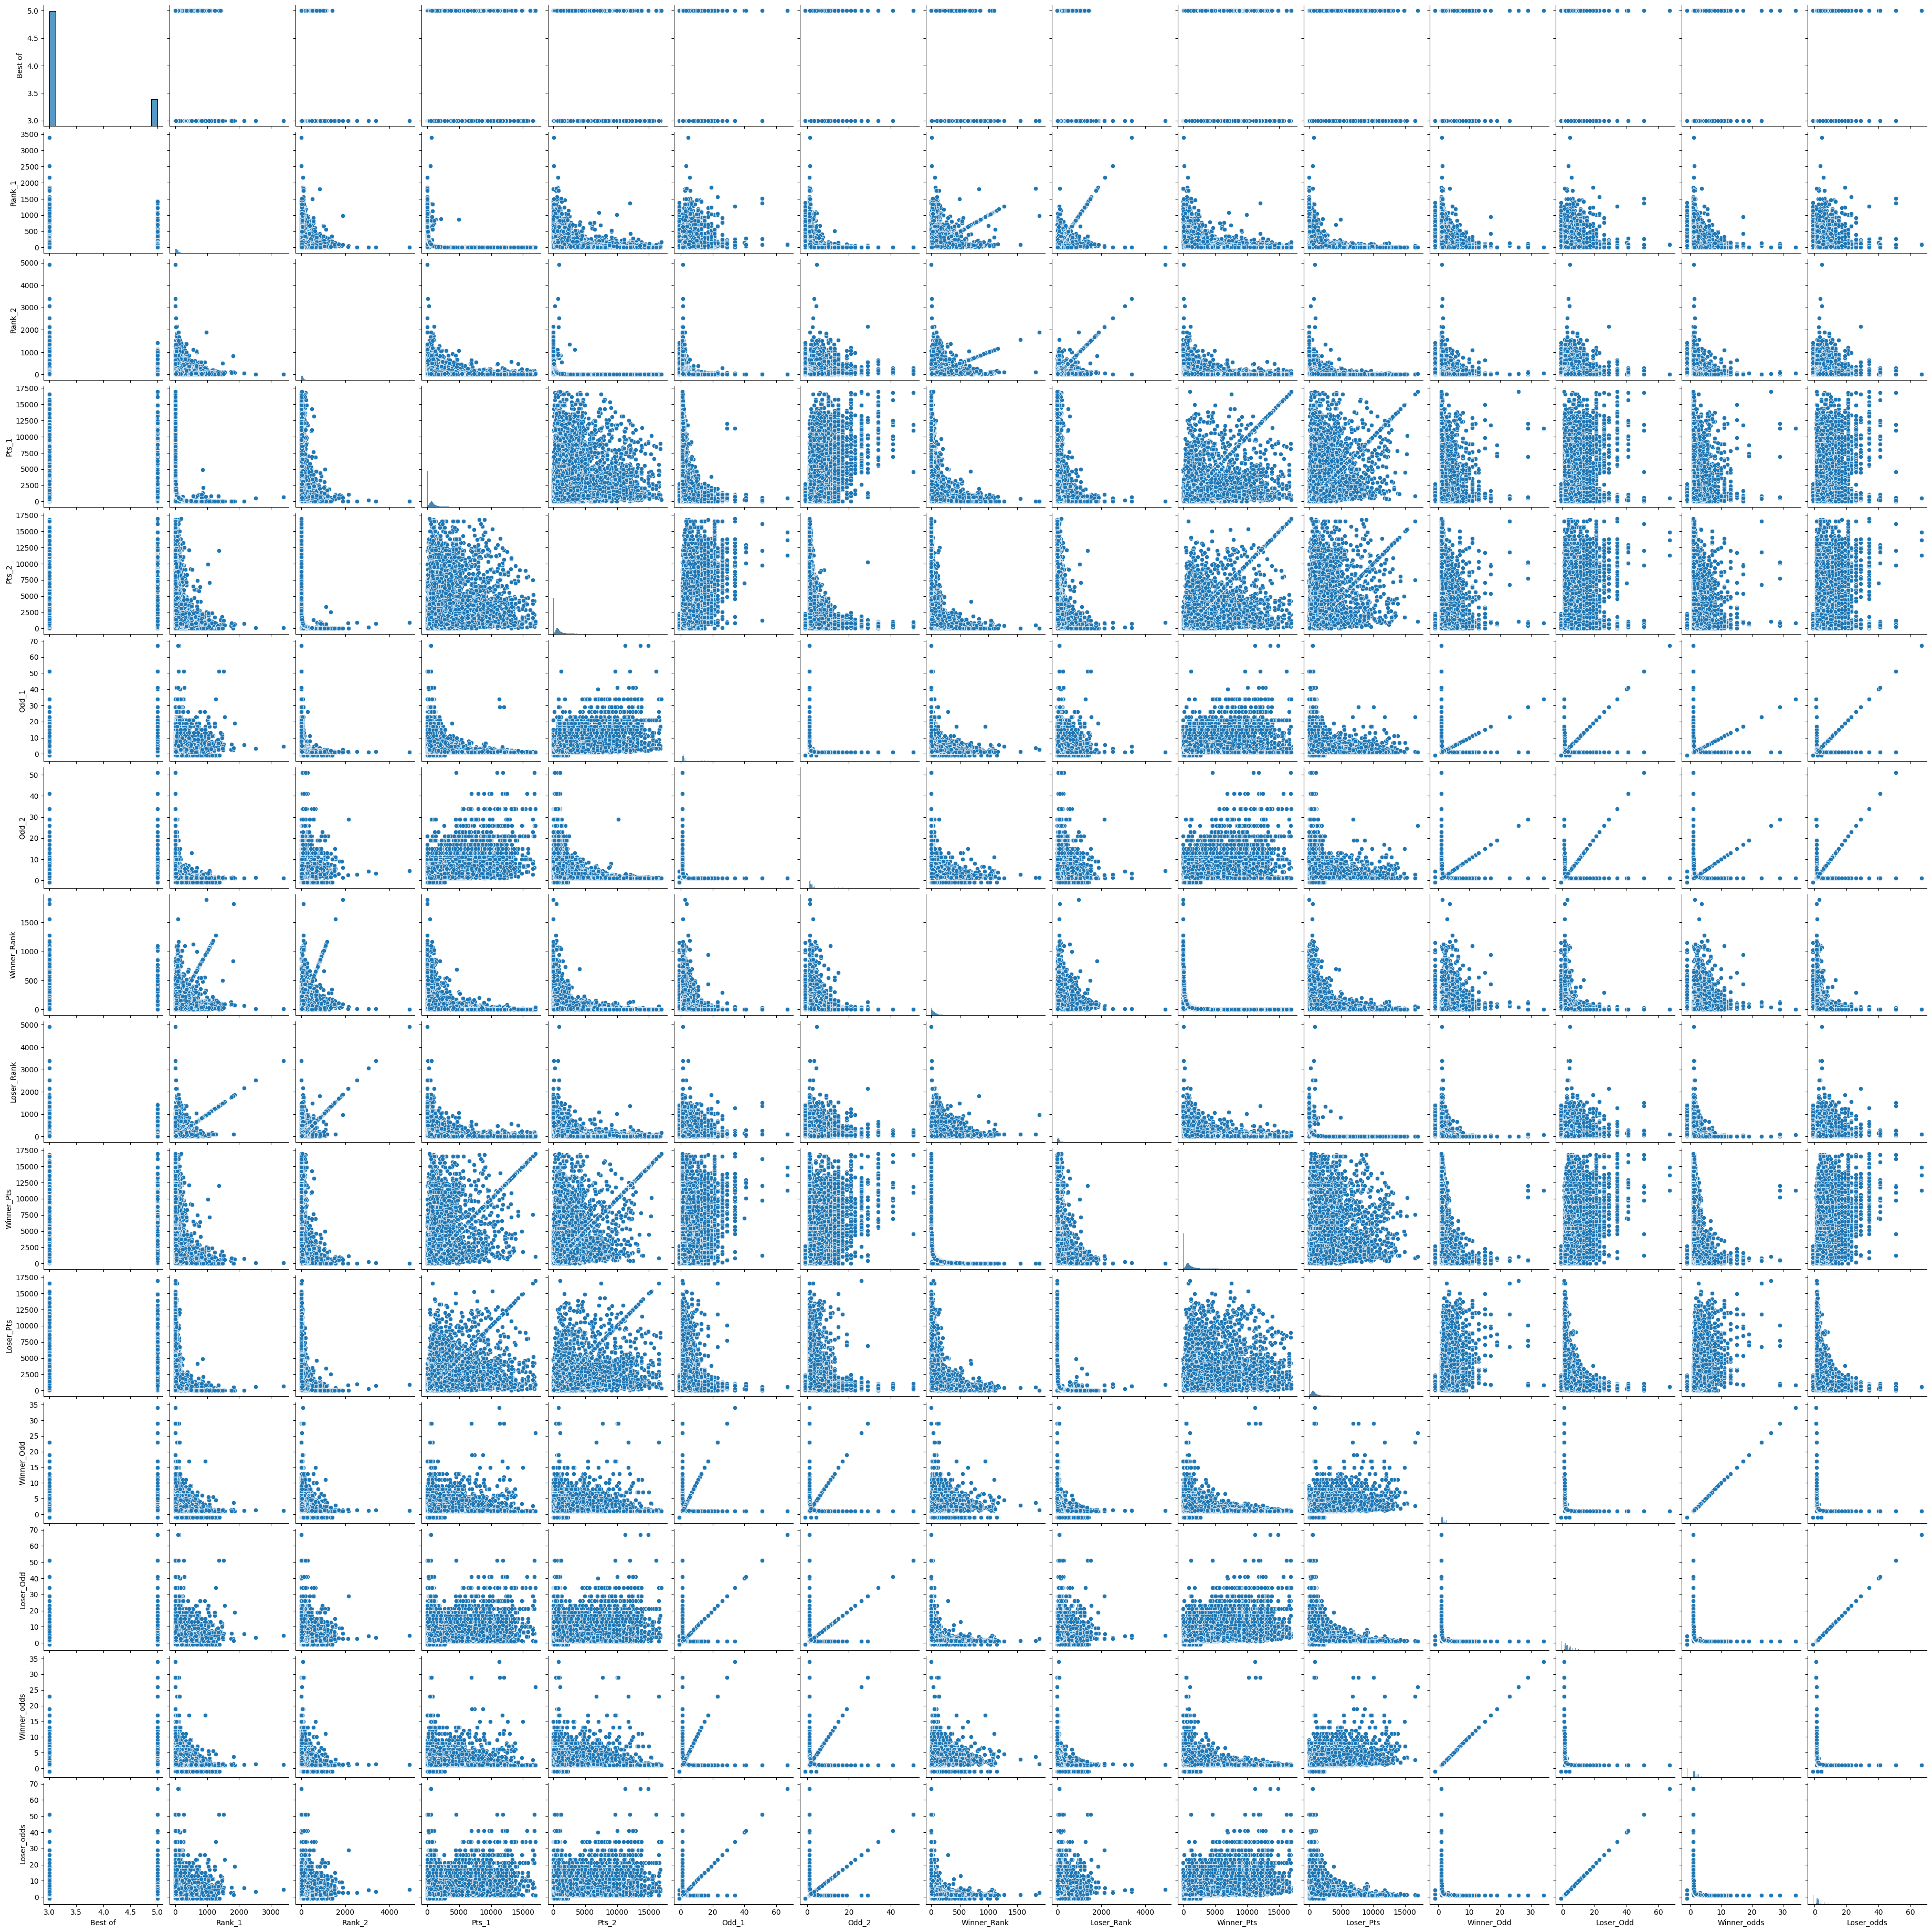

In [71]:
# Pairplot of the dataframe
sns.pairplot(df)
plt.show()

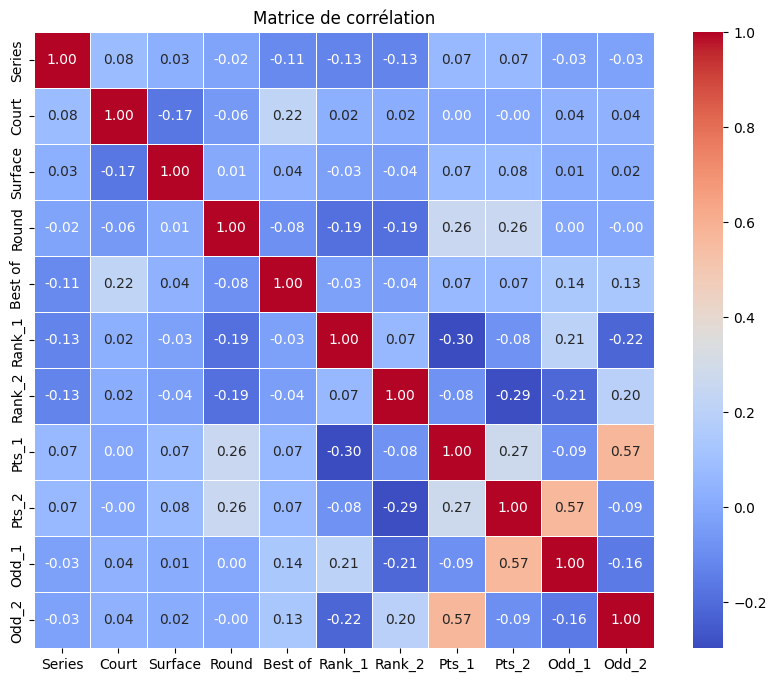

In [98]:


# Encoding categorical features
label_encoder = LabelEncoder()
df['Series'] = label_encoder.fit_transform(df['Series'])
df['Court'] = label_encoder.fit_transform(df['Court'])
df['Surface'] = label_encoder.fit_transform(df['Surface'])
df['Round'] = label_encoder.fit_transform(df['Round'])

X = df.drop(columns=['Winner', 'Player_1', 'Player_2', 'Score', 'Date', 'Tournament'])
y = df['Winner']


# Visualizing the correlation matrix with a heatmap
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice de corrélation')
plt.show()




#### Correlation Matrix Analysis:

- The correlation matrix reveals relationships between various quantitative variables in the dataset:
- The most correlated variables appear to be ranking and ATP points, which is expected as ATP points determine player rankings.
- Bookmakers' odds also show correlations with rankings and ATP points, suggesting that bookmakers consider player rankings when setting odds.

In [109]:
# Player analysis
# Concatenating Player_1 and Player_2 columns into a single 'Players' column
players = pd.concat([df['Player_1'], df['Player_2']]).drop_duplicates()

# Creating a DataFrame to store player statistics
player_stats = pd.DataFrame(index=players, columns=['Matches', 'Wins', 'Win_Rate'])

# Counting the number of matches played by each player
for player in players:
    player_matches = df[(df['Player_1'] == player) | (df['Player_2'] == player)]
    player_stats.loc[player, 'Matches'] = len(player_matches)

# Counting the number of wins by each player
for player in players:
    player_wins = df[(df['Winner'] == player)]
    player_stats.loc[player, 'Wins'] = len(player_wins)

# Calculating the win rate of each player
player_stats['Win_Rate'] = player_stats['Wins'] / player_stats['Matches']

# Displaying the top 10 players with the most wins
print(player_stats.sort_values(by='Wins', ascending=False).head(10))

# Displaying the top 10 players with the highest win rate
print(player_stats.sort_values(by='Win_Rate', ascending=False).head(10))


            Matches  Wins  Win_Rate
Federer R.     1393  1151  0.826274
Djokovic N.    1197  1009  0.842941
Nadal R.       1209  1003  0.829611
Ferrer D.      1035   677  0.654106
Murray A.       924   670  0.725108
Berdych T.      885   575  0.649718
Gasquet R.      938   570  0.607676
Roddick A.      746   564  0.756032
Wawrinka S.     852   526  0.617371
Verdasco F.     955   524  0.548691
                  Matches  Wins  Win_Rate
Murray A.               5     5       1.0
Kohlschreiber P..       1     1       1.0
Ferrer D.               1     1       1.0
Djokovic N.          1197  1009  0.842941
Nadal R.             1209  1003  0.829611
Federer R.           1393  1151  0.826274
Tsitsipas S.            5     4       0.8
Nargiso D.             10     8       0.8
Alcaraz C.            214   169   0.78972
Agassi A.             337   257  0.762611


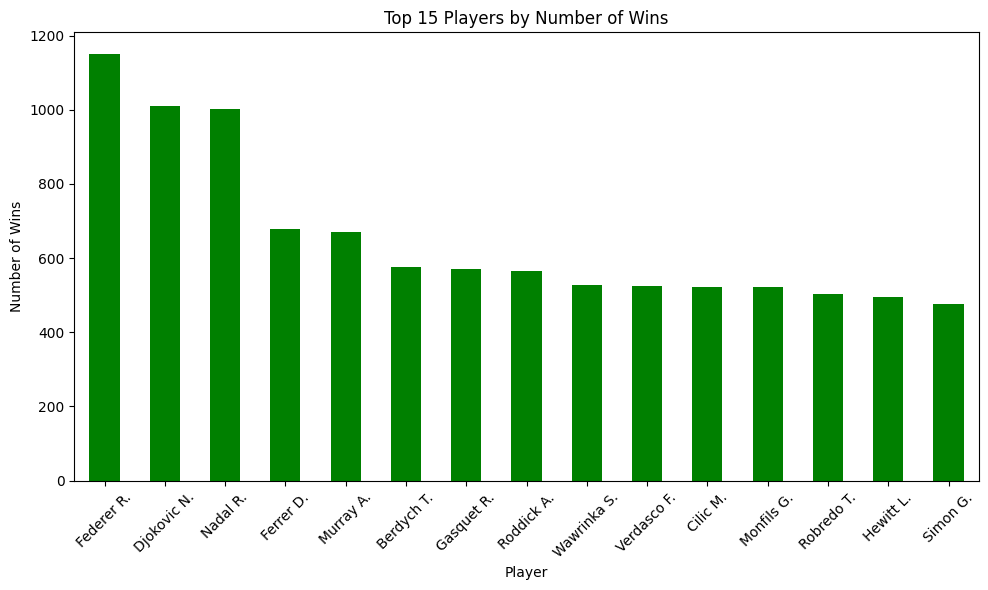

In [111]:
# Calculate the Number of Wins per Player
wins_per_player = df['Winner'].value_counts()

# Select the top 15 players by number of wins
top_players = wins_per_player.head(15)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_players.plot(kind='bar', color='g')
plt.title('Top 15 Players by Number of Wins')
plt.xlabel('Player')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


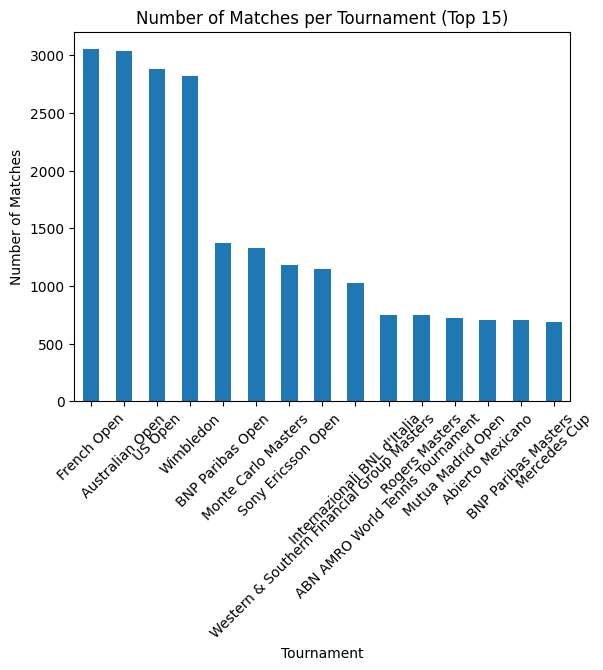

In [112]:
# Count the number of matches per tournament
tournament_matches = df['Tournament'].value_counts()

# Plot the number of matches per tournament (top 15)
tournament_matches.sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Number of Matches per Tournament (Top 15)')
plt.xlabel('Tournament')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

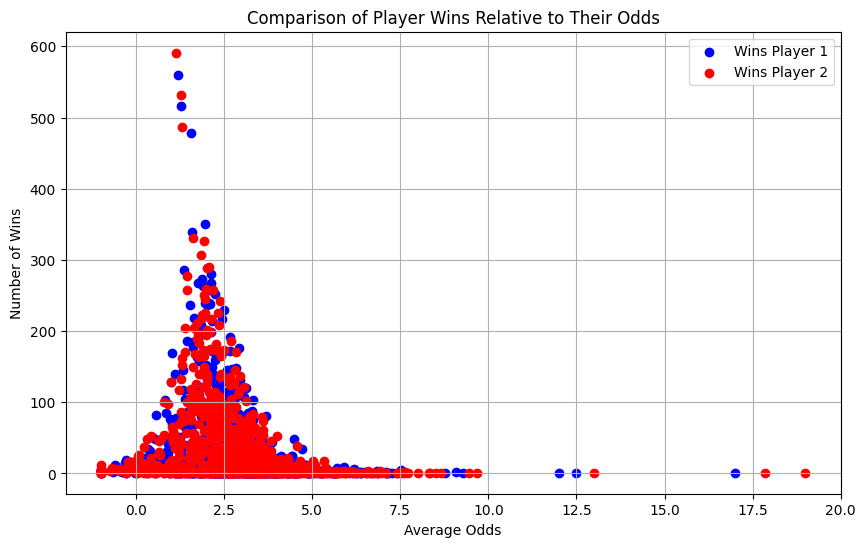

In [113]:
# Calculate the number of wins for each player
wins_player_1 = df[df['Winner'] == df['Player_1']]
wins_player_2 = df[df['Winner'] == df['Player_2']]

# Calculate the average odds for each player
avg_odds_player_1 = df.groupby('Player_1')['Odd_1'].mean()
avg_odds_player_2 = df.groupby('Player_2')['Odd_2'].mean()

# Filter to align win and odds data
aligned_wins_player_1 = wins_player_1.groupby('Player_1').size()
aligned_wins_player_2 = wins_player_2.groupby('Player_2').size()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_odds_player_1.loc[aligned_wins_player_1.index], aligned_wins_player_1, color='b', label='Wins Player 1')
plt.scatter(avg_odds_player_2.loc[aligned_wins_player_2.index], aligned_wins_player_2, color='r', label='Wins Player 2')

plt.title('Comparison of Player Wins Relative to Their Odds')
plt.xlabel('Average Odds')
plt.ylabel('Number of Wins')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
# Calculate the number of wins where the winner had higher odds than the loser
df['Winner_odds'] = df.apply(lambda x: x['Odd_1'] if x['Winner'] == x['Player_1'] else x['Odd_2'], axis=1)
df['Loser_odds'] = df.apply(lambda x: x['Odd_2'] if x['Winner'] == x['Player_1'] else x['Odd_1'], axis=1)

# Filter rows where the winner had higher odds than the loser
df_win_higher_odds = df[df['Winner_odds'] > df['Loser_odds']]

# Calculate the percentage of wins when the winner had higher odds
percentage_win_higher_odds = (len(df_win_higher_odds) / len(df)) * 100

print(f"Percentage of wins when the underdog won: {percentage_win_higher_odds:.2f}%")

# Filter rows where the favorite lost
df_favorite_lost = df[df['Loser_odds'] < df['Winner_odds']]
# Calculate the percentage of losses when the favorite lost
percentage_favorite_lost = (len(df_favorite_lost) / len(df)) * 100

print(f"Percentage of losses when the favorite lost: {percentage_favorite_lost:.2f}%")

# Filter rows where the favorite won
df_favorite_won = df[df['Winner_odds'] < df['Loser_odds']]

# Calculate the percentage of wins when the favorite won
percentage_favorite_won = (len(df_favorite_won) / len(df)) * 100

print(f"Percentage of wins when the favorite won: {percentage_favorite_won:.2f}%")

Percentage of wins when the underdog won: 27.38%
Percentage of losses when the favorite lost: 27.38%
Percentage of wins when the favorite won: 64.54%


#### Analysis of Player Odds
To assess the influence of player odds on match outcomes, several key metrics were calculated:

- Percentage of Wins when the Winner had Higher Odds: We found that in 27.38% of analyzed matches, the winning player had higher odds than their opponent.
  
- Percentage of Losses when the Favorite Lost: Similarly, in 27.38% of cases, the favorite according to the odds was defeated.
  
- Percentage of Wins when the Favorite Won: In the majority of matches (64.54%), the player considered the favorite by bookmakers—i.e., the one with lower odds—won the match.

These results highlight the importance of bookmakers' odds as a potential performance indicator, although they also show a significant proportion of outcomes contrary to initial expectations based on odds.


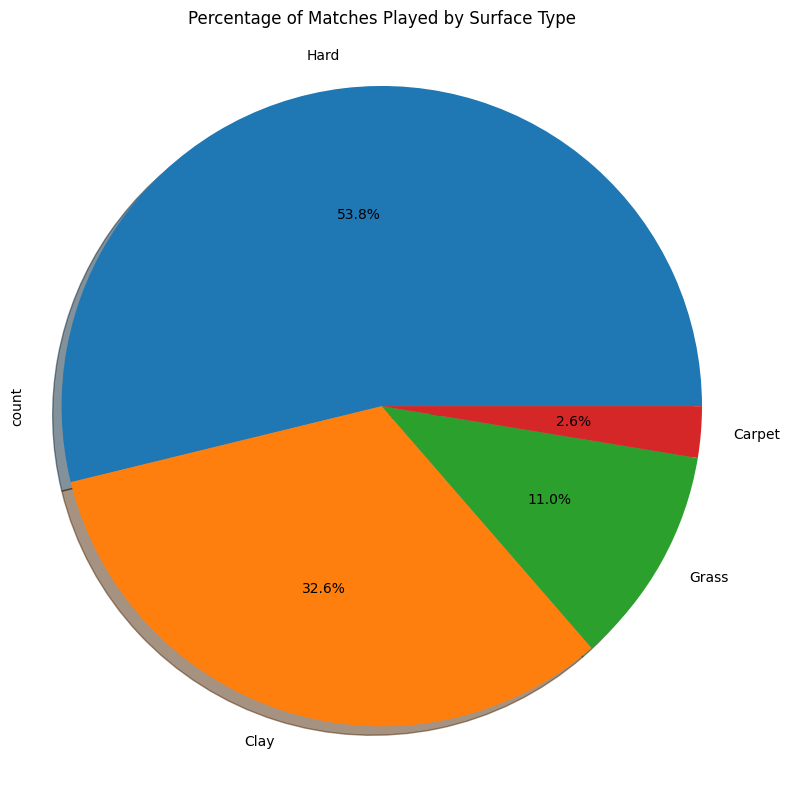

In [115]:
# Calculate the number of matches by surface type
matches_by_surface = df['Surface'].value_counts()

# Calculate the percentage of matches by surface type
percentage_by_surface = matches_by_surface / len(df) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
percentage_by_surface.plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Matches Played by Surface Type')
plt.axis('equal')
plt.tight_layout()
plt.show()


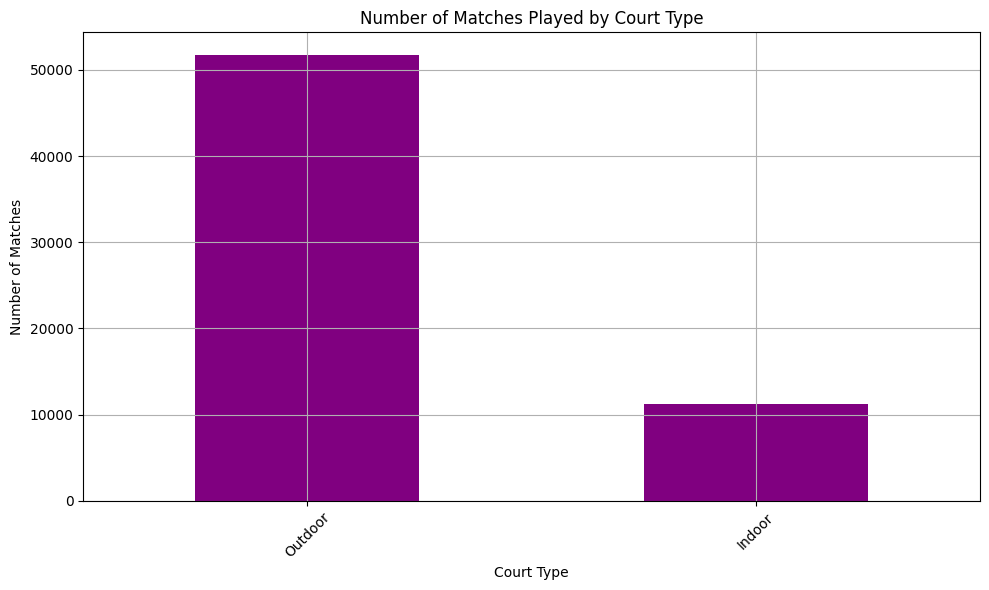

In [116]:
# Calculate the number of matches by court type
matches_by_court = df['Court'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
matches_by_court.plot(kind='bar', color='purple')
plt.title('Number of Matches Played by Court Type')
plt.xlabel('Court Type')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### General Conclusion

This exploratory analysis of ATP tennis tournament data has illuminated several key aspects of the game and its players. Here are the main points to take note of:

**Player Characteristics:** Winners of matches tend to have higher rankings and accumulate more ATP points than losers. This reflects a positive correlation between ATP ranking and match performance.

**Data Variability:** Despite general trends, there is significant variability in the data. Outliers exist in the distributions of rankings, ATP points, and bookmakers' odds, indicating scenarios where lower-ranked players or underdogs have defeated favorites.

**Role of Bookmakers:** Bookmakers' odds show correlation with players' rankings and their performances in terms of ATP points. This suggests that bookmakers consider these factors when setting odds, although there are instances where outcomes differ from their predictions.

**Player Analysis:** By examining individual player statistics, we identified players with the highest number of wins. Federer, Djokovic, and Nadal are among the leaders in terms of victories, highlighting their dominance in ATP tennis over the years.

This analysis provides a robust framework for understanding the dynamics of ATP tennis matches, revealing both overarching trends and nuanced exceptions that enrich our comprehension of the sport.
